# Document setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Manipulation functions

**Reverse** will reverse the ranking scale (so 5 → 1, 2 → 4, etc.); applied to negative questions

**Adjust** will replace the string answer options with a ranking scale 1-5, will drop unecessary columns, reverse negative questions and rename the row indices to the participants' names for easier comparison

There are two significant outliers, that have been ruled out.

In [2]:
def reverse(s):
    out = [10 - int(item) for item in s]
    return out

# Data evaluation

In [45]:
columns = {
    "I would normally say my most dominant player type is" : "S0",

    "ID1" : "Q100",
    "The experience ended by" : "Q101",
    "Please state why you chose to stop the experience" : "Q102",
    "Please elaborate why" : "Q103",
    "During the experience I was thinking about" : "Q104",
    "I can imagine the protagonist, Res, discovering" : "Q105",
    "Res is on a journey to become a fully operational robot" : "Q106",
    "Res has a lot of friends" : "Q107",
    "Res is on a journey to discover what happened in the past" : "Q108",
    "How did you feel for Res throughout the experience?" : "Q109",
    "How did you feel throughout the experience?" : "Q110",
    "I played this mostly using the following player type" : "Q111",
    "Please indicate how much you wanted to continue during the experience" : "Q112",
    "Please describe why you picked that point on the scale above" : "Q113",

    "ID2" : "Q200",
    "The experience ended by.1" : "Q201",
    "Please state why you chose to stop the experience.1" : "Q202",
    "Please elaborate why.1" : "Q203",
    "During the experience I was thinking about.1" : "Q204",
    "I can imagine the protagonist, Res, discovering.1" : "Q205",
    " Res is on a journey to become a fully operational robot" : "Q206",
    "Res has a lot of friends.1" : "Q207",
    "Res is on a journey to discover what happened in the past.1" : "Q208",
    "How did you feel for Res throughout the experience?.1" : "Q209",
    "How did you feel throughout the experience?.1" : "Q210",
    "I played this mostly using the following player type.1" : "Q211",
    "Please indicate how much you wanted to continue during the experience.1" : "Q212",
    "Please describe why you picked that point on the scale above.1" : "Q213"
}

def retrieve(*args):
    return sorted(list(args[0].intersection(*args)))


numeric = {"Q104", "Q105", "Q106", "Q107", "Q108", "Q109", "Q110", "Q112", "Q204", "Q205", "Q206", "Q207", "Q208", "Q209", "Q210", "Q212"}
inversed = ["Q106", "Q107", "Q206", "Q207"]
first = set([question for question in columns.values() if question.startswith("Q1")])
second = set([question for question in columns.values() if question.startswith("Q2")])

In [46]:
responses = pd.read_excel("SEM5 Testing Responses.xlsx")

responses = responses.drop(columns=["Timestamp", "Consent", "I hereby give consent", "Unnamed: 28", "Unnamed: 31", "Unnamed: 34"]
                    ).drop(index=0
                    ).rename(columns=columns)[columns.values()]

responses[inversed] = responses[inversed].apply(reverse)


res_L_first = responses.loc[responses["Q100"].str.startswith("L")]
res_A_first = responses.loc[responses["Q100"].str.startswith("A")]

In [5]:
boxprops = dict(color="#3DB1E5", lw=2)
flierprops = dict(marker='o', markerfacecolor='#D1D2D4', linestyle='none')
medianprops = dict(lw=2, color="#E78E26")

boxplot_settings = {
       "rot" : 45,
       "boxprops" : boxprops,
       "flierprops" : flierprops,
       "medianprops" : medianprops,
       "color" : {'medians': '#E78E26',
                  'boxes': '#3DB1E5'}}

# Within group results
## Condition 1 (Linear first, then adaptive)

In [6]:
comparison_columns = ["Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q12"]

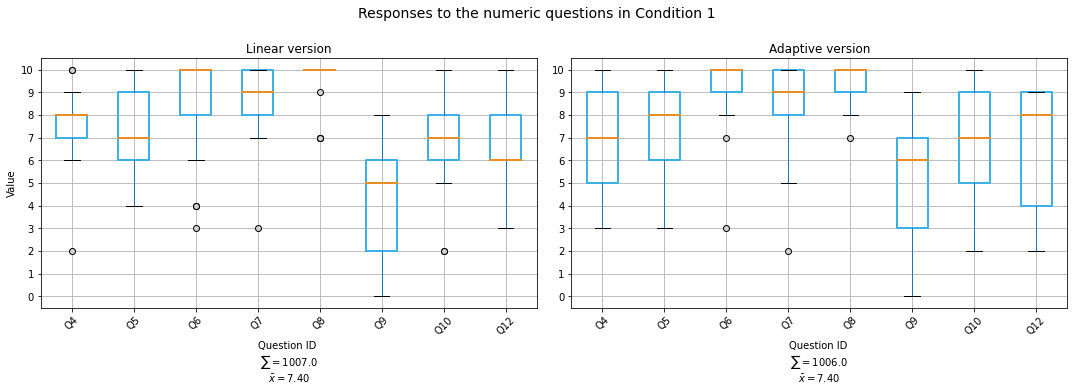

In [7]:
L_first_run = res_L_first[retrieve(numeric, first)].rename(columns=dict(zip(retrieve(numeric, first), comparison_columns)))
L_second_run = res_L_first[retrieve(numeric, second)].rename(columns=dict(zip(retrieve(numeric, second), comparison_columns)))

fig, axes = plt.subplots(1, 2, figsize = (15, 5.5))

LINE = L_first_run.boxplot(**boxplot_settings, ax=axes.flatten()[0])
ADAP = L_second_run.boxplot(**boxplot_settings, ax=axes.flatten()[1])

LINE_stats = r"$\sum = $" + str(sum(L_first_run.sum())) + "\n" + r"$\bar{x} = $" + "{:.2f}".format(np.mean(L_first_run.mean()))
ADAP_stats = r"$\sum = $" + str(sum(L_second_run.sum())) + "\n" + r"$\bar{x} = $" + "{:.2f}".format(np.mean(L_second_run.mean()))

LINE.set(title="Linear version", xlabel=f"Question ID \n{LINE_stats}", ylabel="Value", yticks=np.arange(0,11,1))
ADAP.set(title="Adaptive version", xlabel=f"Question ID \n{ADAP_stats}", yticks=np.arange(0,11,1))

plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.85)
plt.suptitle("Responses to the numeric questions in Condition 1", size=14, weight="medium")
plt.show()

## Condition 2 (Adaptive first, then linear)

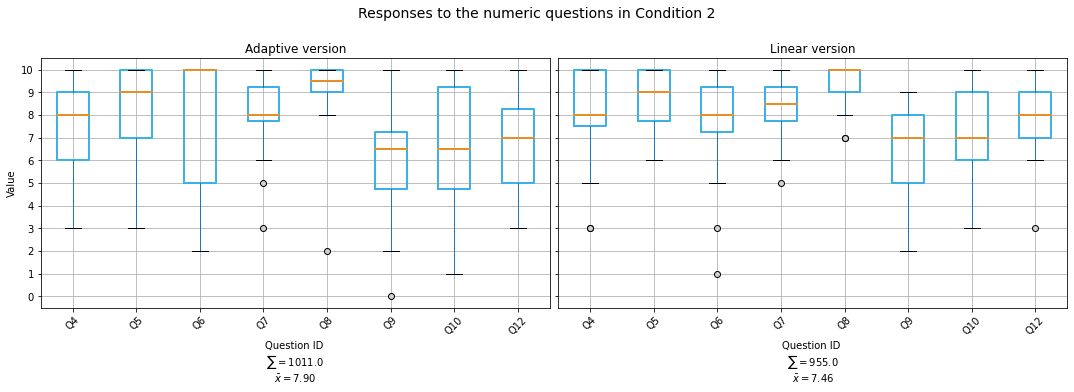

In [8]:
A_first_run = res_A_first[retrieve(numeric, first)].rename(columns=dict(zip(retrieve(numeric, first), comparison_columns)))
A_second_run = res_A_first[retrieve(numeric, second)].rename(columns=dict(zip(retrieve(numeric, second), comparison_columns)))

fig, axes = plt.subplots(1, 2, figsize = (15, 5.5), sharey=True)

ADAP = A_second_run.boxplot(**boxplot_settings, ax=axes.flatten()[0])
LINE = A_first_run.boxplot(**boxplot_settings, ax=axes.flatten()[1])

ADAP_stats = r"$\sum = $" + str(sum(A_first_run.sum())) + "\n" + r"$\bar{x} = $" + "{:.2f}".format(np.mean(A_first_run.mean()))
LINE_stats = r"$\sum = $" + str(sum(A_second_run.sum())) + "\n" + r"$\bar{x} = $" + "{:.2f}".format(np.mean(A_second_run.mean()))

LINE.set(title="Linear version", xlabel=f"Question ID \n{LINE_stats}", yticks=np.arange(0,11,1))
ADAP.set(title="Adaptive version", xlabel=f"Question ID \n{ADAP_stats}", ylabel="Value", yticks=np.arange(0,11,1))

plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.85)
plt.suptitle("Responses to the numeric questions in Condition 2", size=14, weight="medium")
plt.show()

## Combined conditions, by question

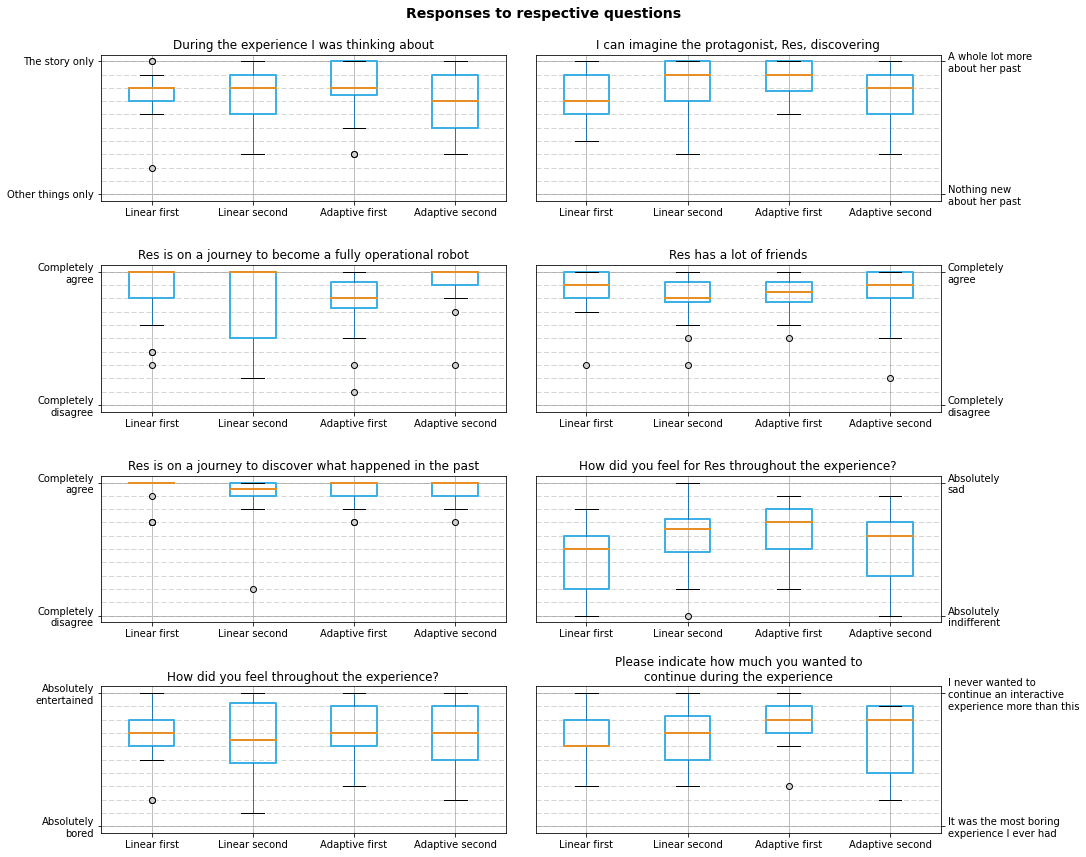

In [9]:
all_boxplot_questions = {
    "Q4" : "During the experience I was thinking about",
    "Q5" : "I can imagine the protagonist, Res, discovering",
    "Q6" : "Res is on a journey to become a fully operational robot",
    "Q7" : "Res has a lot of friends",
    "Q8" : "Res is on a journey to discover what happened in the past",
    "Q9" : "How did you feel for Res throughout the experience?",
    "Q10" : "How did you feel throughout the experience?",
    "Q12" : "Please indicate how much you wanted to\ncontinue during the experience"
}

all_boxplot_answers = {
    "Q4" : ["Other things only", "The story only"],
    "Q5" : ["Nothing new\nabout her past", "A whole lot more\nabout her past"],
    "Q6" : ["Completely\ndisagree", "Completely\nagree"],
    "Q7" : ["Completely\ndisagree", "Completely\nagree"],
    "Q8" : ["Completely\ndisagree", "Completely\nagree"],
    "Q9" : ["Absolutely\nindifferent", "Absolutely\nsad"],
    "Q10" : ["Absolutely\nbored", "Absolutely\nentertained"],
    "Q12" : ["It was the most boring\nexperience I ever had", "I never wanted to\ncontinue an interactive\nexperience more than this"]
}

questionBoxplots = []

for i in comparison_columns:
    a = pd.DataFrame()
    a['C1L'] = L_first_run.reset_index(drop=True)[i]
    a['C2L'] = A_second_run.reset_index(drop=True)[i]
    #a['L'] = pd.Series(FULL_LINEAR.reset_index(drop=True)[i])
    #a['A'] = pd.Series(FULL_ADAPTIVE.reset_index(drop=True)[i])
    a['C1A'] = A_first_run.reset_index(drop=True)[i]
    a['C2A'] = L_second_run.reset_index(drop=True)[i]
    questionBoxplots.append(a)

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15, 12))

for i in range(len(questionBoxplots)//2):
    for j in range(2):
        for k in range(11):
            axes[i][j].axhline(k, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)

        questionBoxplots[i*2+j].boxplot(**{**boxplot_settings, "rot" : 0}, ax=axes[i][j])
        
        axes[i][j].set(yticks=np.arange(0, 11, step=10), yticklabels=all_boxplot_answers[comparison_columns[i*2+j]])
        axes[i][j].set(xticklabels=["Linear first", "Linear second", "Adaptive first", "Adaptive second"])

        if j == 1: axes[i][j].tick_params(axis='y', left=False, right=True, labelleft=False, labelright=True)
        
        title = all_boxplot_questions[comparison_columns[i*2+j]]

        axes[i][j].set_title(title)
        plt.tight_layout(pad=0.4, w_pad=3, h_pad=2)

fig.suptitle("Responses to respective questions", size=14, weight="semibold")
plt.subplots_adjust(top=0.925)
fig.show()

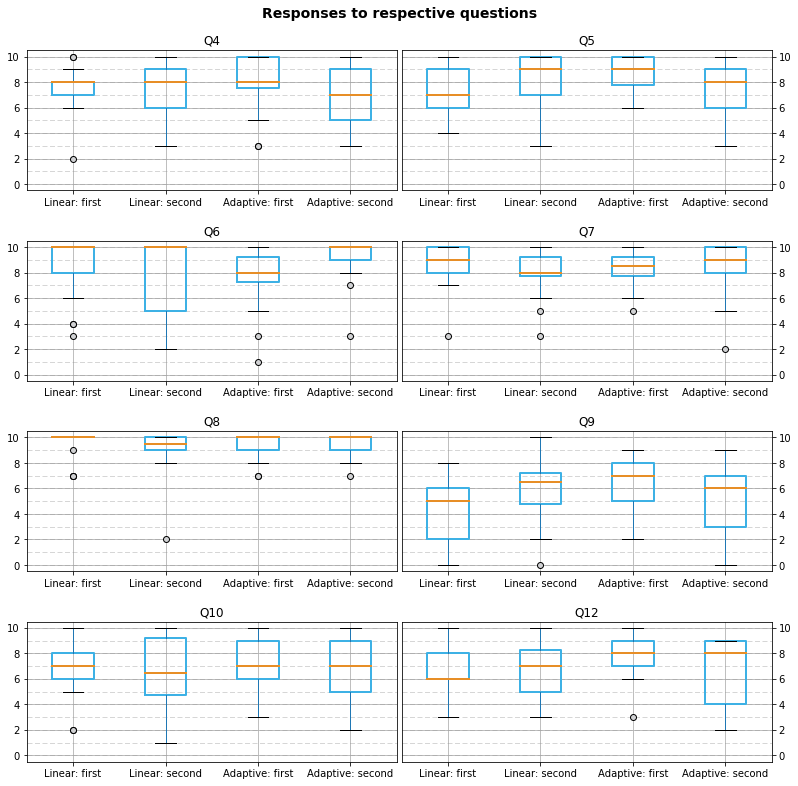

In [10]:
questionBoxplots = []

for i in range(len(comparison_columns)):
    a = pd.DataFrame()
    a['C1L'] = res_L_first[retrieve(numeric, first)[i]].reset_index(drop=True)
    a['C2L'] = res_A_first[retrieve(numeric, second)[i]].reset_index(drop=True)
    a['C2A'] = res_A_first[retrieve(numeric, first)[i]].reset_index(drop=True)
    a['C1A'] = res_L_first[retrieve(numeric, second)[i]].reset_index(drop=True)
    questionBoxplots.append(a)

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(11, 11))

for i in range(len(questionBoxplots)//2):
    for j in range(2):        
        for k in range(11):
            axes[i][j].axhline(k, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)

        questionBoxplots[i*2+j].boxplot(**{**boxplot_settings, "rot" : 0}, ax=axes[i][j])
        
        axes[i][j].set(yticks=np.arange(0, 11, step=2))
        axes[i][j].set(xticklabels=["Linear: first", "Linear: second", "Adaptive: first", "Adaptive: second"])
        
        if j == 1: axes[i][j].tick_params(axis='y', left=False, right=True, labelleft=False, labelright=True)

        title = comparison_columns[i*2+j]

        axes[i][j].set_title(title)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2)

fig.suptitle("Responses to respective questions", size=14, weight="semibold")
plt.subplots_adjust(top=0.925)
fig.show()

In [11]:
FULL_LINEAR = pd.concat([
    res_L_first[retrieve(numeric, first)].rename(columns=dict(zip(retrieve(numeric, first), comparison_columns))),
    res_A_first[retrieve(numeric, second)].rename(columns=dict(zip(retrieve(numeric, second), comparison_columns)))])

FULL_ADAPTIVE = pd.concat([
    res_A_first[retrieve(numeric, first)].rename(columns=dict(zip(retrieve(numeric, first), comparison_columns))),
    res_L_first[retrieve(numeric, second)].rename(columns=dict(zip(retrieve(numeric, second), comparison_columns)))])

In [12]:
ours = pd.DataFrame([FULL_LINEAR.drop(columns=["Q12"]).sum(1)/7, FULL_ADAPTIVE.drop(columns=["Q12"]).sum(1)/7]).transpose().rename(columns={0 : "Linear", 1: "Adaptive"})
his = pd.DataFrame(columns=["Linear", "Adaptive"])
his["Linear"] = pd.Series(FULL_LINEAR["Q12"])
his["Adaptive"] = pd.Series(FULL_ADAPTIVE["Q12"])

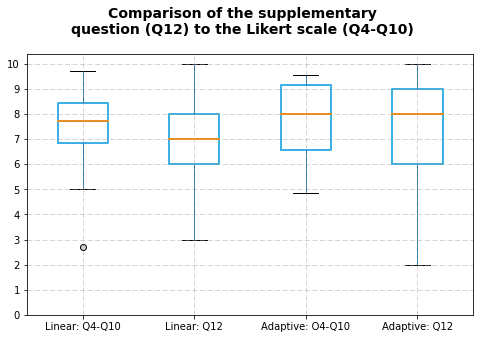

In [13]:
p = pd.DataFrame()
p["Linear: Q4-Q10"] = ours["Linear"]
p["Linear: Q12"] = his["Linear"]
p["Adaptive: O4-Q10"] = ours["Adaptive"]
p["Adaptive: Q12"] = his["Adaptive"]

fig = p.boxplot(**{**boxplot_settings, "rot": "0"}, grid=False, figsize=(8, 5))

fig.set(yticks=np.arange(0, 11, step=1))
for i in np.arange(0, 11, step=1):
    fig.axhline(i, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)

for i in fig.get_xticks():
    fig.axvline(i, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)

plt.suptitle("Comparison of the supplementary\nquestion (Q12) to the Likert scale (Q4-Q10)", size=14, weight="semibold")
plt.subplots_adjust(top=0.85)
plt.show()

# ALL DATA 
## TEST OF VARIANCE and HOMOGENITY 

In [14]:
linearSum = FULL_LINEAR.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
adaptiveSum = FULL_ADAPTIVE.apply(pd.Series.value_counts).fillna(0).sum(axis=1)

In [15]:
l = pd.DataFrame([FULL_LINEAR.median()])
a = pd.DataFrame([FULL_ADAPTIVE.median()])

a.mean(axis=1)
l.mean(axis=1)

0    8.125
dtype: float64

In [16]:
p = stats.levene(linearSum.dropna(), adaptiveSum.dropna()).pvalue
print("p = %.4f" % p)
print("p > a = %r" % (p > 0.05))
#If p < 0.05 then the assumption of homogenity between the two variances has been violated

p = 0.9493
p > a = True


In [17]:
[W_wo, p_wo] = stats.shapiro(linearSum.dropna())
[W_w, p_w] = stats.shapiro(adaptiveSum.dropna())


print(W_wo, p_wo)

print(W_w, p_w)

0.8567878007888794 0.0523109994828701
0.8710740208625793 0.08002415299415588


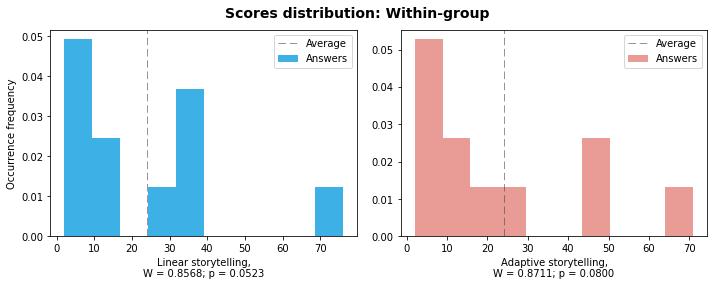

In [18]:
fig, (histC1, histC2) = plt.subplots(1, 2, figsize = (10,4))

linearSum.hist(ax=histC1, density=True, bins=10, color="#3DB1E5", label="Answers", grid=False)
histC1.set(xlabel="Linear storytelling,\nW = %.4f; p = %.4f" % (W_wo, p_wo), ylabel="Occurrence frequency")
histC1.axvline(x=linearSum.mean(), color="#444444", alpha=0.75, lw=0.75, dashes = [10, 5], label="Average")
histC1.legend()

histC2.hist(adaptiveSum, density=True, bins=10, color="#E99B96", label="Answers")
histC2.set(xlabel=f"Adaptive storytelling,\nW = %.4f; p = %.4f" % (W_w, p_w))
histC2.axvline(x=adaptiveSum.mean(), color="#444444", alpha=0.75, lw=0.75, dashes=[10, 5], label="Average")
histC2.legend()

plt.suptitle("Scores distribution: Within-group", size=14, weight="semibold")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

In [19]:
linearSum

0.0      4.0
1.0      2.0
2.0      7.0
3.0     16.0
4.0      8.0
5.0     13.0
6.0     31.0
7.0     35.0
8.0     38.0
9.0     34.0
10.0    76.0
dtype: float64

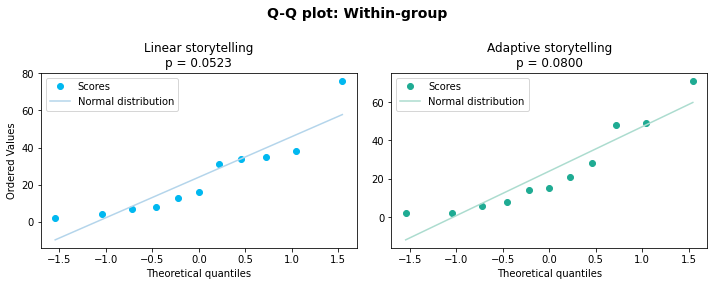

In [20]:
fig = plt.figure(figsize = (10, 4))

ax_wo = fig.add_subplot(121)
QQWithout = stats.probplot(linearSum.dropna(), plot=plt)
ax_wo.get_lines()[0].set_markerfacecolor("#00B8F0")
ax_wo.get_lines()[0].set_color("#00B8F0")
ax_wo.get_lines()[1].set_color("#B4D5EB")
ax_wo.set_title("Linear storytelling\np = %.4f" % p_wo)
ax_wo.legend(["Scores", "Normal distribution"])

ax_w = fig.add_subplot(122)
QQWith = stats.probplot(adaptiveSum.dropna(), plot=plt)
ax_w.get_lines()[0].set_markerfacecolor("#1FAB93")
ax_w.get_lines()[0].set_color("#1FAB93")
ax_w.get_lines()[1].set_color("#ACDCCF")
ax_w.set_title("Adaptive storytelling\np = %.4f" % p_w)
ax_w.set_ylabel("")
ax_w.legend(["Scores", "Normal distribution"])

plt.suptitle("Q-Q plot: Within-group", size=14, weight="semibold")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.75)

plt.show()

## T-TEST

In [21]:
# the method returns the value of the statistic (t) and the probability value (p)
t, p = stats.ttest_ind(linearSum, adaptiveSum)
print ('T-stat: %.4f' % t, '\np-value: %.4f' % p)


T-stat: 0.0000 
p-value: 1.0000


---

# BETWEEN-GROUP - FIRST TRY

In [22]:
responses1 = pd.read_excel("preprocseed_data.xlsx",sheet_name="first")

inversed=["Res is on a journey to become a fully operational robot","Res is on a journey to discover what happened in the past"]
responses1[inversed] = responses1[inversed].apply(reverse)


res_L_first = responses1.loc[responses1["ID1"].str.startswith("L")]
res_L_first = res_L_first.drop("ID1",1)
res_A_first = responses1.loc[responses1["ID1"].str.startswith("A")]
res_A_first = res_A_first.drop("ID1",1)

In [23]:
linFirstSum = res_L_first.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
adapFirstSum = res_A_first.apply(pd.Series.value_counts).fillna(0).sum(axis=1)


In [24]:
p = stats.levene(linFirstSum.dropna(), adapFirstSum.dropna()).pvalue
print("p = %.4f" % p)
print("p > a = %r" % (p > 0.05))
#If p < 0.05 then the assumption of homogenity between the two variances has been violated

p = 0.2868
p > a = True


In [25]:
[W_wo, p_wo] = stats.shapiro(linFirstSum.dropna())
[W_w, p_w] = stats.shapiro(adapFirstSum.dropna())


print(W_wo, p_wo)

print(W_w, p_w)

0.9055469036102295 0.21580111980438232
0.940747857093811 0.5293301939964294


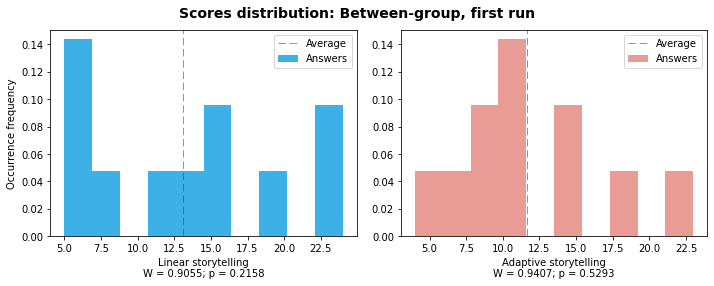

In [26]:
fig, (histC1, histC2) = plt.subplots(1, 2, figsize = (10,4))

histC1.hist(linFirstSum, density=True, bins=10, color="#3DB1E5", label="Answers")
histC1.set(xlabel="Linear storytelling\nW = %.4f; p = %.4f" % (W_wo, p_wo), ylabel="Occurrence frequency")
histC1.axvline(x=linFirstSum.mean(), color="#444444", alpha=0.75, lw=0.75, label="Average").set_dashes([10, 5])

histC2.hist(adapFirstSum, density=True, bins=10, color="#E99B96", label="Answers")
histC2.set(xlabel=f"Adaptive storytelling\nW = %.4f; p = %.4f" % (W_w, p_w))
histC2.axvline(x=adapFirstSum.mean(), color="#444444", alpha=0.75, lw=0.75, label="Average").set_dashes([10, 5])

plt.suptitle("Scores distribution: Between-group, first run", size=14, weight="semibold")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

histC1.legend()
histC2.legend()

plt.show()

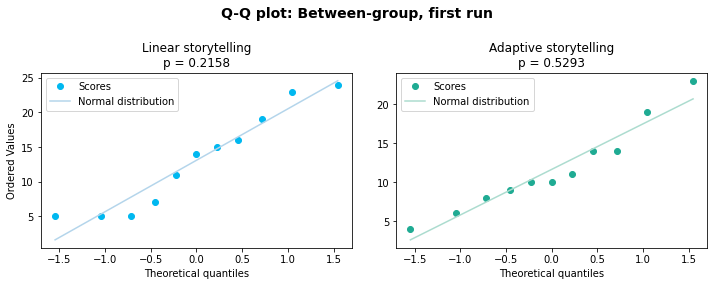

In [27]:
fig = plt.figure(figsize = (10, 4))

ax_wo = fig.add_subplot(121)
QQWithout = stats.probplot(linFirstSum.dropna(), plot=plt)
ax_wo.get_lines()[0].set_markerfacecolor("#00B8F0")
ax_wo.get_lines()[0].set_color("#00B8F0")
ax_wo.get_lines()[1].set_color("#B4D5EB")
ax_wo.set_title("Linear storytelling\np = %.4f" % p_wo)
ax_wo.legend(["Scores", "Normal distribution"])

ax_w = fig.add_subplot(122)
QQWith = stats.probplot(adapFirstSum.dropna(), plot=plt)
ax_w.get_lines()[0].set_markerfacecolor("#1FAB93")
ax_w.get_lines()[0].set_color("#1FAB93")
ax_w.get_lines()[1].set_color("#ACDCCF")
ax_w.set_title("Adaptive storytelling\np = %.4f" % p_w)
ax_w.set_ylabel("")
ax_w.legend(["Scores", "Normal distribution"])

plt.suptitle("Q-Q plot: Between-group, first run", size=14, weight="semibold")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.75)

plt.show()

In [28]:
# the method returns the value of the statistic (t) and the probability value (p)
t, p = stats.ttest_ind(linFirstSum, adapFirstSum)
print ('T-stat: %.4f' % t, '\np-value: %.4f' % p)

T-stat: 0.5349 
p-value: 0.5986


---

# BETWEEN-GROUP - SECOND TRY


In [29]:
responses2 = pd.read_excel("preprocseed_data.xlsx",sheet_name="second")

inversed=["Res is on a journey to become a fully operational robot","Res is on a journey to discover what happened in the past"]
responses2[inversed] = responses2[inversed].apply(reverse)


res_L_second = responses2.loc[responses2["ID2"].str.startswith("L")]
res_L_second = res_L_second.drop("ID2",1)
res_A_second = responses2.loc[responses2["ID2"].str.startswith("A")]
res_A_second = res_A_second.drop("ID2",1)

In [30]:
linSecondSum = res_L_second.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
adapSecondSum = res_A_second.apply(pd.Series.value_counts).fillna(0).sum(axis=1)

In [31]:
p = stats.levene(linSecondSum.dropna(), adapSecondSum.dropna()).pvalue
print("p = %.4f" % p)
print("p > a = %r" % (p > 0.05))
#If p < 0.05 then the assumption of homogenity between the two variances has been violated

p = 0.4981
p > a = True


In [32]:
[W_wo, p_wo] = stats.shapiro(linSecondSum.dropna())
[W_w, p_w] = stats.shapiro(adapSecondSum.dropna())


print(W_wo, p_wo)

print(W_w, p_w)

0.9078444242477417 0.22991874814033508
0.9009991884231567 0.19011245667934418


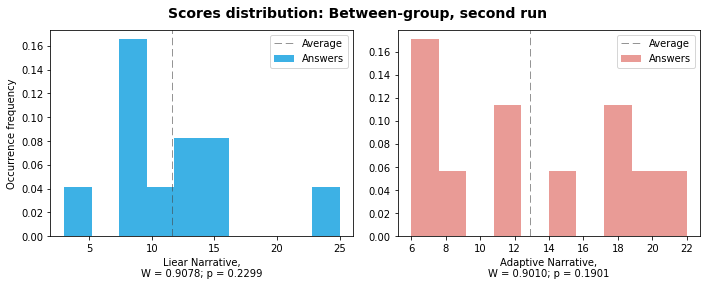

In [33]:
fig, (histC1, histC2) = plt.subplots(1, 2, figsize = (10,4))

histC1.hist(linSecondSum, density=True, bins=10, color="#3DB1E5", label="Answers")
histC1.set(xlabel="Liear Narrative,\nW = %.4f; p = %.4f" % (W_wo, p_wo), ylabel="Occurrence frequency")
histC1.axvline(x=linSecondSum.mean(), color="#444444", alpha=0.75, lw=0.75, label="Average").set_dashes([10, 5])

histC2.hist(adapSecondSum, density=True, bins=10, color="#E99B96", label="Answers")
histC2.set(xlabel=f"Adaptive Narrative,\nW = %.4f; p = %.4f" % (W_w, p_w))
histC2.axvline(x=adapSecondSum.mean(), color="#444444", alpha=0.75, lw=0.75, label="Average").set_dashes([10, 5])

histC1.legend()
histC2.legend()

plt.suptitle("Scores distribution: Between-group, second run", size=14, weight="semibold")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

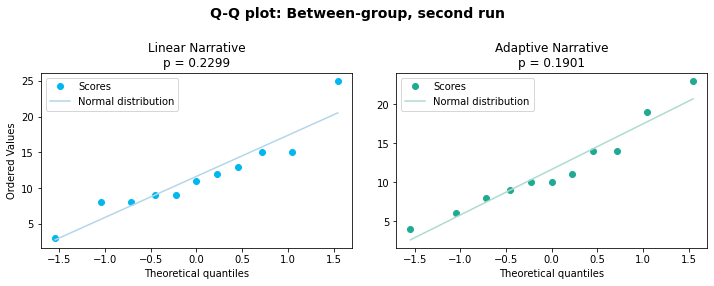

In [34]:
fig = plt.figure(figsize = (10, 4))

ax_wo = fig.add_subplot(121)
QQWithout = stats.probplot(linSecondSum.dropna(), plot=plt)
ax_wo.get_lines()[0].set_markerfacecolor("#00B8F0")
ax_wo.get_lines()[0].set_color("#00B8F0")
ax_wo.get_lines()[1].set_color("#B4D5EB")
ax_wo.set_title("Linear Narrative\np = %.4f" % p_wo)
ax_wo.legend(["Scores", "Normal distribution"])

ax_w = fig.add_subplot(122)
QQWith = stats.probplot(adapFirstSum.dropna(), plot=plt)
ax_w.get_lines()[0].set_markerfacecolor("#1FAB93")
ax_w.get_lines()[0].set_color("#1FAB93")
ax_w.get_lines()[1].set_color("#ACDCCF")
ax_w.set_title("Adaptive Narrative\np = %.4f" % p_w)
ax_w.set_ylabel("")
ax_w.legend(["Scores", "Normal distribution"])

plt.suptitle("Q-Q plot: Between-group, second run", size=14, weight="semibold")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.75)

plt.show()

In [43]:
FULL_LINEAR

,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q12
1,10,10,10,10,10,8,10,8.0
4,2,4,10,10,10,0,2,4.0
7,7,8,10,9,10,1,7,7.0
8,10,10,10,10,10,8,9,8.0
9,7,6,10,10,10,4,6,6.0
11,9,7,9,9,10,6,9,9.0
14,8,7,8,10,7,6,7,7.0
15,7,6,10,8,10,0,7,6.0
17,7,7,3,10,9,5,7,6.0
19,8,7,10,3,10,5,8,6.0


In [35]:
# the method returns the value of the statistic (t) and the probability value (p)
t, p = stats.ttest_ind(linSecondSum, adapSecondSum)
print ('T-stat: %.4f' % t, '\np-value: %.4f' % p)

T-stat: -0.5144 
p-value: 0.6126


In [47]:
finish_reason = pd.DataFrame()
finish_reason["Linear"] = res_L_first["Q101"].append(res_A_first["Q201"])
finish_reason["Adaptive"] = res_A_first["Q101"].append(res_L_first["Q201"])

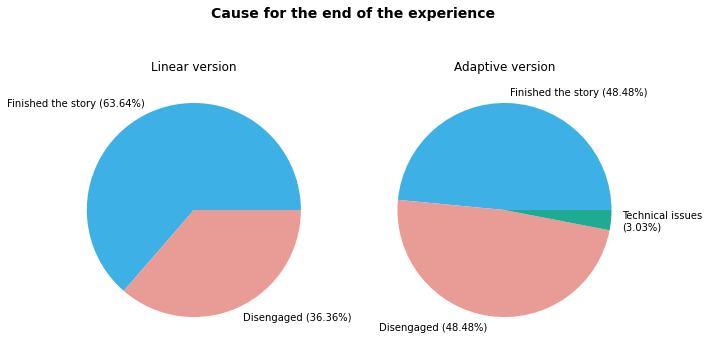

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

fr_L = finish_reason["Linear"].value_counts()
fr_L_vals = [val/fr_L.sum() for val in fr_L.values]

fr_L = fr_L.rename({
    "Finishing the story" : "Finished the story (%.2f"%(fr_L_vals[0]*100) + "%)",
    'Pressing "Stop" when I was asked if I want to continue' : "Disengaged (%.2f"%(fr_L_vals[1]*100) + "%)"
    })

fr_A = finish_reason["Adaptive"].value_counts()
fr_A_vals = [val/fr_A.sum() for val in fr_A.values]

fr_A = fr_A.rename({
    "Finishing the story" : "Finished the story (%.2f"%(fr_A_vals[0]*100) + "%)",
    'Pressing "Stop" when I was asked if I want to continue' : "Disengaged (%.2f"%(fr_A_vals[1]*100) + "%)",
    "I finished the story with technical issues" : "Technical issues\n(%.2f"%(fr_A_vals[2]*100) + "%)"
    })

fr_L.plot(kind="pie", ax = axes[0], colors=["#3DB1E5", "#E99B96"], title="Linear version", ylabel="")
fr_A.plot(kind="pie", ax = axes[1], colors=["#3DB1E5", "#E99B96", "#1FAB93"], title="Adaptive version", ylabel="")

plt.suptitle("Cause for the end of the experience", size=14, weight="semibold")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.80)

plt.show()

In [49]:
player_types = pd.DataFrame()
player_types["Linear"] = res_L_first["Q111"].append(res_A_first["Q211"])
player_types["Adaptive"] = res_A_first["Q111"].append(res_L_first["Q211"])

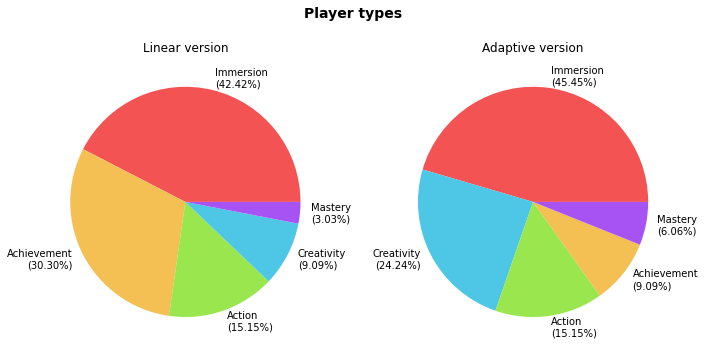

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

pt_L = player_types["Linear"].value_counts()
pt_L_vals = [val/pt_L.sum() for val in pt_L.values]

pt_L = pt_L.rename(dict(zip(pt_L.index.to_list(), [item + "\n(%.2f"%(pt_L_vals[index]*100) + "%)" for index, item in enumerate(pt_L.index.to_list())])))

pt_A = player_types["Adaptive"].value_counts()
pt_A_vals = [val/pt_A.sum() for val in pt_A.values]

pt_A = pt_A.rename(dict(zip(pt_A.index.to_list(), [item + "\n(%.2f"%(pt_A_vals[index]*100) + "%)" for index, item in enumerate(pt_A.index.to_list())])))

pt_L.plot(kind="pie", ax = axes[0], colors=["#F45353", "#F4C053", "#9AE64E", "#4EC6E6", "#A753F4"], title="Linear version", ylabel="")
pt_A.plot(kind="pie", ax = axes[1], colors=["#F45353", "#4EC6E6", "#9AE64E", "#F4C053", "#A753F4"], title="Adaptive version", ylabel="")

plt.suptitle("Player types", size=14, weight="semibold")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.85)

plt.show()

In [51]:
full_reason = pd.DataFrame()
full_reason["Linear"] = res_L_first["Q102"].append(res_A_first["Q202"])
full_reason["Adaptive"] = res_A_first["Q102"].append(res_L_first["Q202"])

In [52]:
full_reason["Adaptive"].unique()

array(['It was easy', nan, 'I got bored', "I couldn't find anymore clues",
       "i began to find the same clues but knew i wouldn't find the answer from the test before",
       'I did not know what to do next', 'i did it by accident'],
      dtype=object)

In [61]:
cat = ["I was confused with the story",
       "I did not know what to do next",
       "I got bored",
       "I felt the story was bad"]

fr_l_cat = full_reason["Linear"].dropna().loc[full_reason["Linear"].dropna().isin(cat)].value_counts()
fr_l_other = len(full_reason["Linear"].dropna().loc[~full_reason["Linear"].dropna().isin(cat)])
fr_a_cat = full_reason["Adaptive"].dropna().loc[full_reason["Adaptive"].dropna().isin(cat)].value_counts()
fr_a_other = len(full_reason["Adaptive"].dropna().loc[~full_reason["Adaptive"].dropna().isin(cat)])

fr_l_cat = fr_l_cat.append(pd.Series([fr_l_other], index=["Other"]))
fr_a_cat = fr_a_cat.append(pd.Series([fr_a_other], index=["Other"]))

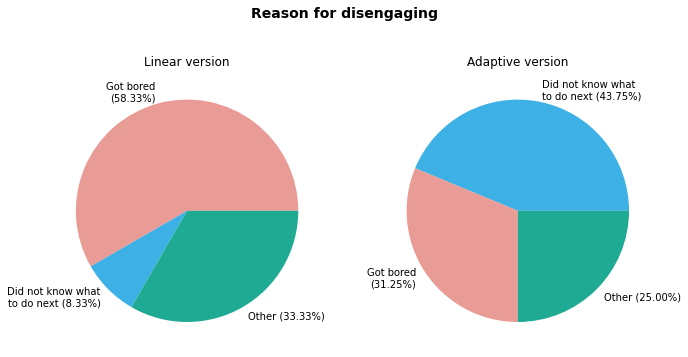

In [62]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

fr_l_cat_vals = [val/fr_l_cat.sum() for val in fr_l_cat.values]

fr_l_cat = fr_l_cat.rename({
    "I got bored" : "Got bored\n(%.2f"%(fr_l_cat_vals[0]*100) + "%)",
    "I did not know what to do next" : "Did not know what\nto do next (%.2f"%(fr_l_cat_vals[1]*100) + "%)",
    "Other" : "Other (%.2f"%(fr_l_cat_vals[2]*100) + "%)"
    })

fr_a_cat_vals = [val/fr_a_cat.sum() for val in fr_a_cat.values]

fr_a_cat = fr_a_cat.rename({
    "I got bored" : "Got bored\n(%.2f"%(fr_a_cat_vals[1]*100) + "%)",
    "I did not know what to do next" : "Did not know what\nto do next (%.2f"%(fr_a_cat_vals[0]*100) + "%)",
    "Other" : "Other (%.2f"%(fr_a_cat_vals[2]*100) + "%)"
    })

fr_l_cat.plot(kind="pie", ax = axes[0], colors=["#E99B96", "#3DB1E5", "#1FAB93"], title="Linear version", ylabel="")
fr_a_cat.plot(kind="pie", ax = axes[1], colors=["#3DB1E5", "#E99B96", "#1FAB93"], title="Adaptive version", ylabel="")

plt.suptitle("Reason for disengaging", size=14, weight="semibold")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.80)

plt.show()

In [59]:
fr_a_cat

Did not know what\nto do next (31.25%)    7
Got bored\n(43.75%)                       5
Other (25.00%)                            4
dtype: int64